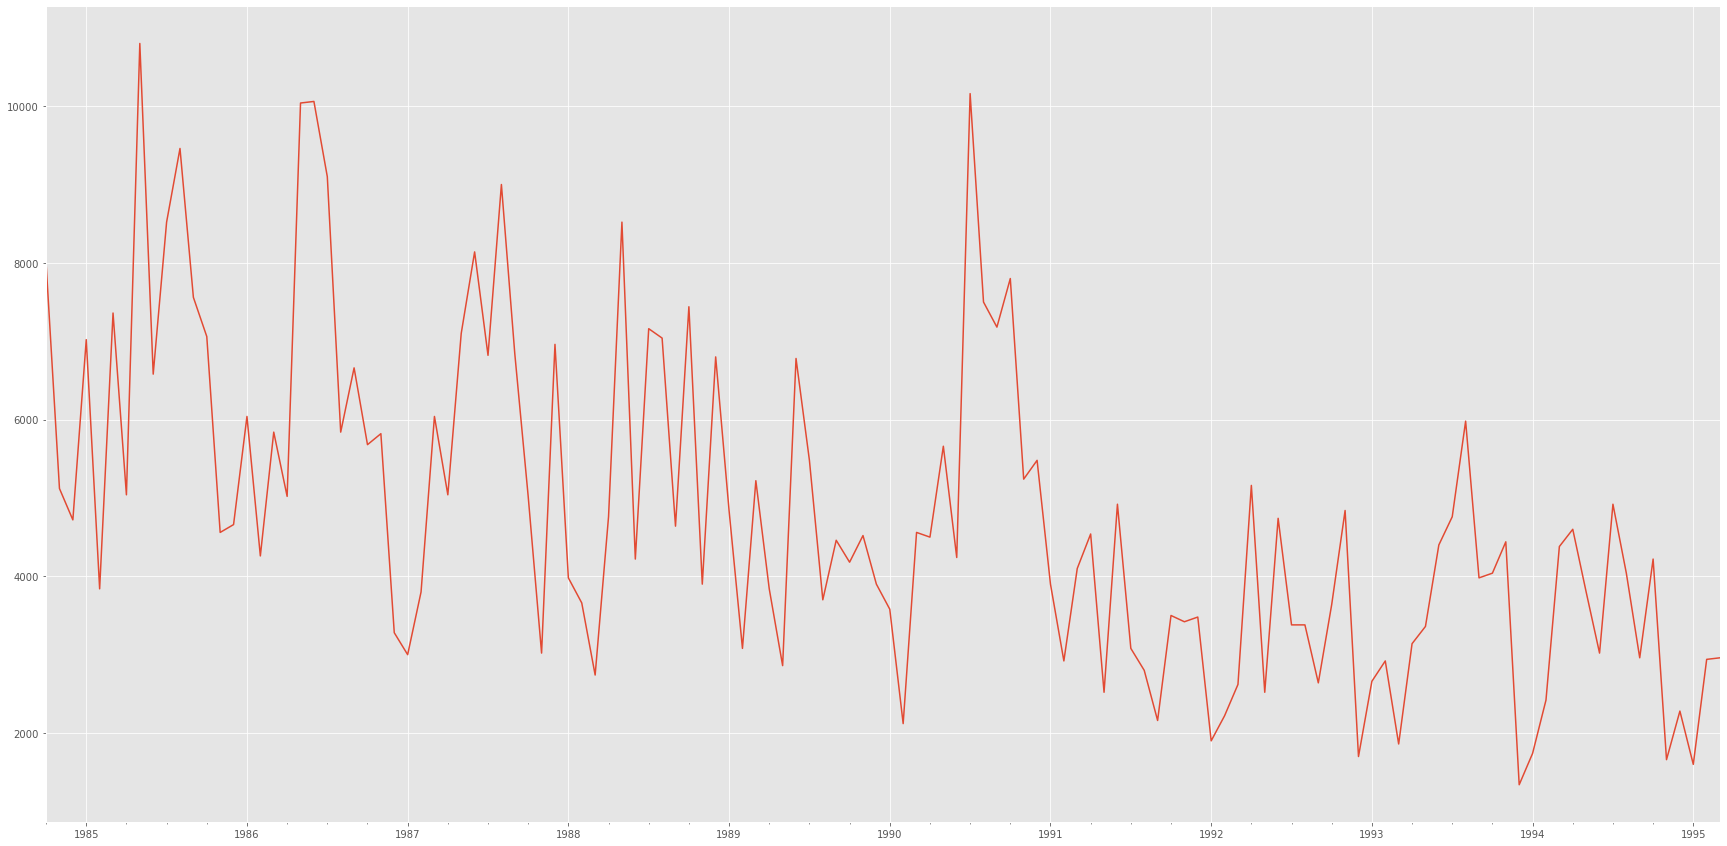

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import STL
from scipy.stats import boxcox 
from scipy.special import inv_boxcox
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sktime.forecasting.ets import AutoETS 
from itertools import product
import warnings 
from scipy.special import inv_boxcox
plt.style.use('ggplot')

m3_full=[8000,5120,4720,7020,3840,7360,5040,10800,6580,8520,9460,7560,7060,4560,4660,6040, 4260,5840,5020,
       10040,10060,9100,5840,6660,5680,5820, 3280, 3000,3800,6040,5040,7100,8140,6820,9000,6840,5020,
       3020,6960,3980,3660,2740,4760,8520,4220,7160,7040,4640,7440,3900,6800,4840,3080,5220,3840,2860,
       6780,5480,3700,4460,4180,4520,3900,3580,2120,4560,4500,5660,4240,10160,7500,7180,7800,5240,5480,
       3900,2920,4100,4540,	2520,4920,3080,2800,2160,3500,3420,3480,1900,2220,2620,5160,2520,4740,3380,3380,
       2640,3640,4840,1700,2660,2920,1860,3140,3360,4400,4760,5980,3980,4040,4440,1340,1740,2420,4380,4600,3800,
       3020,4920,4040,2960,4220,1660,2280,1600,2940,2960]

###一維度 dataframe tX1

m3_full= pd.Series(
    m3_full, index=pd.date_range("1984-10-1", periods=len(m3_full), freq="M"), name="m3_full")


T=len(m3_full)
m3_full.plot()
plt.show(block=True)




/var/folders/4p/_w7sb0h97x989ymb8f68ts_h0000gn/T/ipykernel_3448/2590131912.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nb=np.int(n/l)+2


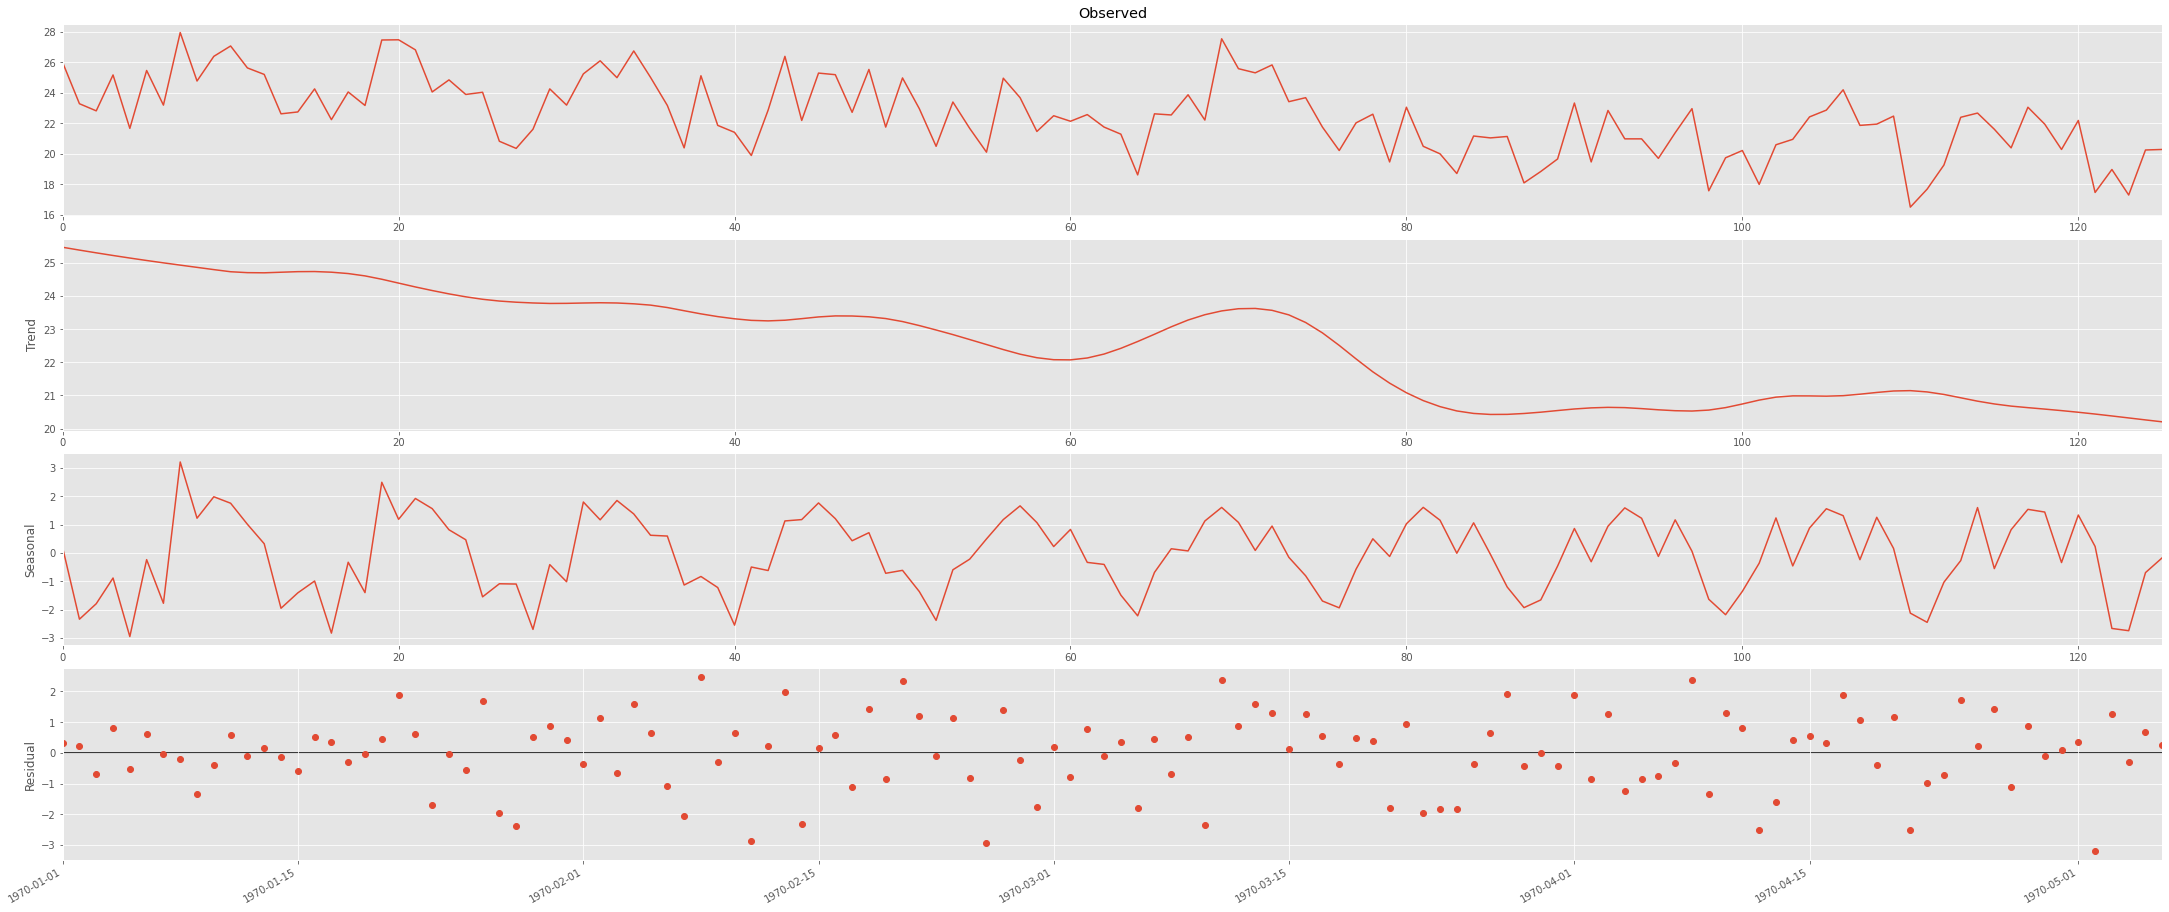

In [104]:
m3_full_transformed, lambda_ = boxcox(m3_full)
stl = STL(m3_full_transformed, seasonal=13,period=12)
res=stl.fit()
trend = res.trend
seasonal = res.seasonal
plt.rcParams["figure.figsize"]=(30,15)
res.plot()
def mbb(x,l):  #l block size
    n=len(x) #the length of data
    nb=np.int(n/l)+2
    idx=np.random.randint(n-l,size=nb)
    z=[]
    for ii in idx:
        z=z+list(x[ii:ii+l]) 
    z=z[np.random.randint(l):]
    z=z[:n]
    return(z)

z =mbb(res.resid,8)
z=pd.Series(z,index=m3_full.index)
z.plot()
plt.show()

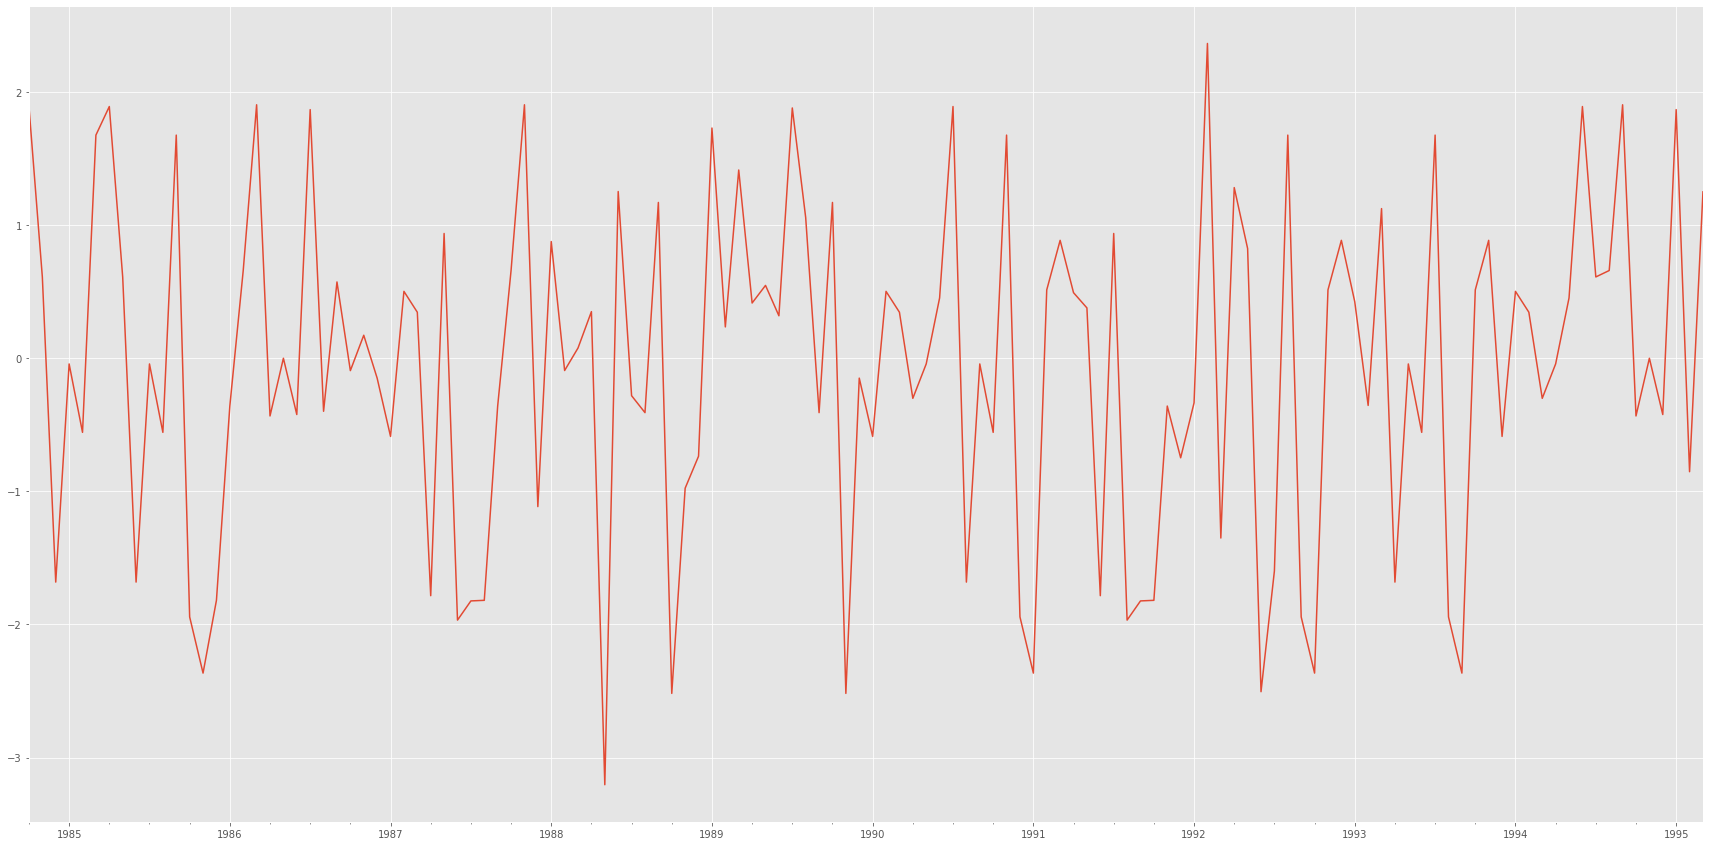

In [105]:
plt.rcParams["figure.figsize"]=(30,15)
z.plot()
plt.show(block=True)

In [106]:
#  moving block bootstrap
l = 24 # block size
B = 101 # number of bootstrapped series
T1=len(m3_full)+len(range(1,13))
fcast_h=list(range(1,13))

bt_m3_full = pd.DataFrame(np.zeros((len(m3_full),B)),index=m3_full.index) #
m3_full_fcast=pd.DataFrame(np.zeros((T1,B)),index=pd.date_range(start=m3_full.index[0],periods=T1,freq="M")) 

for bb in range(B):
    z = mbb(res.resid,l) 
    bt_m3_full.iloc[:,bb]= np.array(z)+trend+seasonal




/var/folders/4p/_w7sb0h97x989ymb8f68ts_h0000gn/T/ipykernel_3448/2590131912.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nb=np.int(n/l)+2
/var/folders/4p/_w7sb0h97x989ymb8f68ts_h0000gn/T/ipykernel_3448/2590131912.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the r

In [107]:
inv_box_cox =inv_boxcox(bt_m3_full, lambda_)
inv_box_cox 


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
1984-10-31,5138.887776,9309.987473,4651.148234,6340.484834,10144.367002,9309.987473,7241.873607,9855.814931,9178.325135,5130.727930,...,6834.550281,10319.880593,7880.010169,6912.131543,7099.002809,9060.145910,5426.628806,10144.367002,7127.001535,6733.670673
1984-11-30,7318.988523,5035.394978,6227.895553,6278.587264,4229.511595,5035.394978,5490.433402,3461.927230,4826.480779,5374.963146,...,6444.195794,3228.338791,6868.289168,5364.781141,6741.358664,4380.474681,7442.165902,4229.511595,5430.073372,4637.855113
1984-12-31,6182.990032,6604.183090,5959.865605,4592.315483,6573.795551,6604.183090,3163.704730,3489.343265,6463.921743,6189.762527,...,5954.218324,5468.583949,3523.470920,5653.261468,4594.599411,6952.939627,5061.698861,6573.795551,5245.264234,7868.504826
1985-01-31,7931.746079,6718.654228,8335.672619,8935.698781,5775.941904,6718.654228,6367.740358,6672.256438,5349.753671,6575.219920,...,5097.739136,6734.084082,6284.603014,5827.934044,7516.358481,6826.456744,6809.316531,5978.509108,6308.093791,4867.902628
1985-02-28,5315.815404,3961.177132,3909.567065,5231.520903,5155.958800,3961.177132,5966.098929,4947.063523,2422.512559,3966.503030,...,2888.493843,3447.053358,4680.858240,4197.023785,3360.881637,3465.341314,2443.922531,3800.928104,4116.947149,5297.920802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-11-30,2989.557058,3498.699314,2758.661283,2256.617290,2497.963419,2877.735538,3475.417620,4144.382561,4344.392207,4022.922818,...,1923.447599,4495.222409,3721.096920,2459.448214,2947.246710,2939.222236,2447.095732,2497.963419,5004.866449,3965.155071
1994-12-31,2846.704923,1900.784830,1202.936831,1824.894047,1453.887106,2000.259049,1511.366149,1370.374084,1131.413173,1329.337006,...,1413.900646,1453.771235,989.174151,1607.674426,2242.032946,2581.129742,2293.738624,1453.887106,1642.943878,986.114635
1995-01-31,1257.752383,1136.934373,1685.588062,1433.822922,1336.642467,1687.618334,1900.668007,2050.191022,989.397118,1409.239533,...,1446.497499,2214.908177,1187.614900,1923.547626,953.350525,1409.126499,2027.799795,2833.185168,1950.040167,1370.234557
1995-02-28,3300.710989,3090.884452,2300.393617,2992.296302,1683.934038,2471.925534,1571.033651,2526.547105,2847.648532,2212.196680,...,3589.822613,1993.833796,2793.280277,2526.140090,2110.300410,3280.737785,1520.122618,2423.646102,1396.571288,2217.581270


In [108]:

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.figure(figsize=(30,40))
MAPEs = []
for bb in range(B):
    inv_box_cox_series = inv_box_cox.iloc[:,bb]
    X_train, X_test = inv_box_cox_series[:-12], inv_box_cox_series[-12:]
    autoets = AutoETS(auto=True,n_jobs=-1,sp=12,maxiter=5000)
    autoets.fit(X_train)
    y_pred = autoets.predict(fcast_h)
    mape = mean_absolute_percentage_error(X_test, y_pred)
    print("this is mape ",mape)
    MAPEs.append(mape)
    np.median(MAPEs)
    #plt.subplot(B, 1, bb + 1)
    #plt.plot(X_train, label="data_train")
    #plt.plot(X_test,label="data_test")
    #plt.plot(X_test.index, y_pred, label="forecast")
    #plt.title("Data in-sample predict")
    #plt.legend(loc="best")
best_model = MAPEs.index(min(MAPEs))
print("model no best predict",best_model,np.min(MAPEs))
print("median mape",MAPEs.index(np.median(MAPEs)),np.median(MAPEs))

#plt.tight_layout()
#plt.savefig("data-in-sample-predict.jpg")
#plt.show()




this is mape  0.2714743937047109
this is mape  0.3266363631987806
this is mape  0.30992439615962697
this is mape  0.44491728630347294
this is mape  0.29009877781869425
this is mape  0.3179961579536301
this is mape  0.21012958227321085
this is mape  0.5198039223657629
this is mape  0.4502115902985517
this is mape  0.24726186164490202
this is mape  0.38895740683126295
this is mape  0.2677703839721519
this is mape  0.13791628136684356
this is mape  0.2809281409382314
this is mape  0.3848140101932594
this is mape  0.24944192445959776
this is mape  0.43537450538858596
this is mape  0.314694614638679
this is mape  0.36636730185129585
this is mape  0.2968094768877632
this is mape  0.30812960655631555
this is mape  0.43465363095769766
this is mape  0.3579073475323858
this is mape  0.28281050863095286
this is mape  0.2515302137208833
this is mape  0.24316041068859362
this is mape  0.3585215294810435
this is mape  0.43092489278528534
this is mape  0.2610300831050394
this is mape  0.4267956438953

<Figure size 2160x2880 with 0 Axes>

1994-04-30    3479.812912
1994-05-31    4854.226922
1994-06-30    4535.394002
1994-07-31    4744.172812
1994-08-31    4907.454485
1994-09-30    3966.745829
1994-10-31    4202.577113
1994-11-30    3457.939687
1994-12-31    3449.632379
1995-01-31    3084.518440
1995-02-28    2817.312151
1995-03-31    3525.056934
Freq: M, dtype: float64
this is mape  0.532902095117863
1994-04-30    2994.567604
1994-05-31    3491.571816
1994-06-30    3127.639038
1994-07-31    3878.314386
1994-08-31    3524.508507
1994-09-30    2854.040407
1994-10-31    2835.239585
1994-11-30    1994.108215
1994-12-31    1938.411562
1995-01-31    2115.642923
1995-02-28    1577.910195
1995-03-31    2454.884506
Freq: M, dtype: float64
this is mape  0.23039029558247048
1994-04-30    3259.759080
1994-05-31    4447.587382
1994-06-30    4217.409227
1994-07-31    5194.216759
1994-08-31    4479.087888
1994-09-30    3885.973033
1994-10-31    3976.229109
1994-11-30    2917.404783
1994-12-31    3038.616223
1995-01-31    2635.681765
19

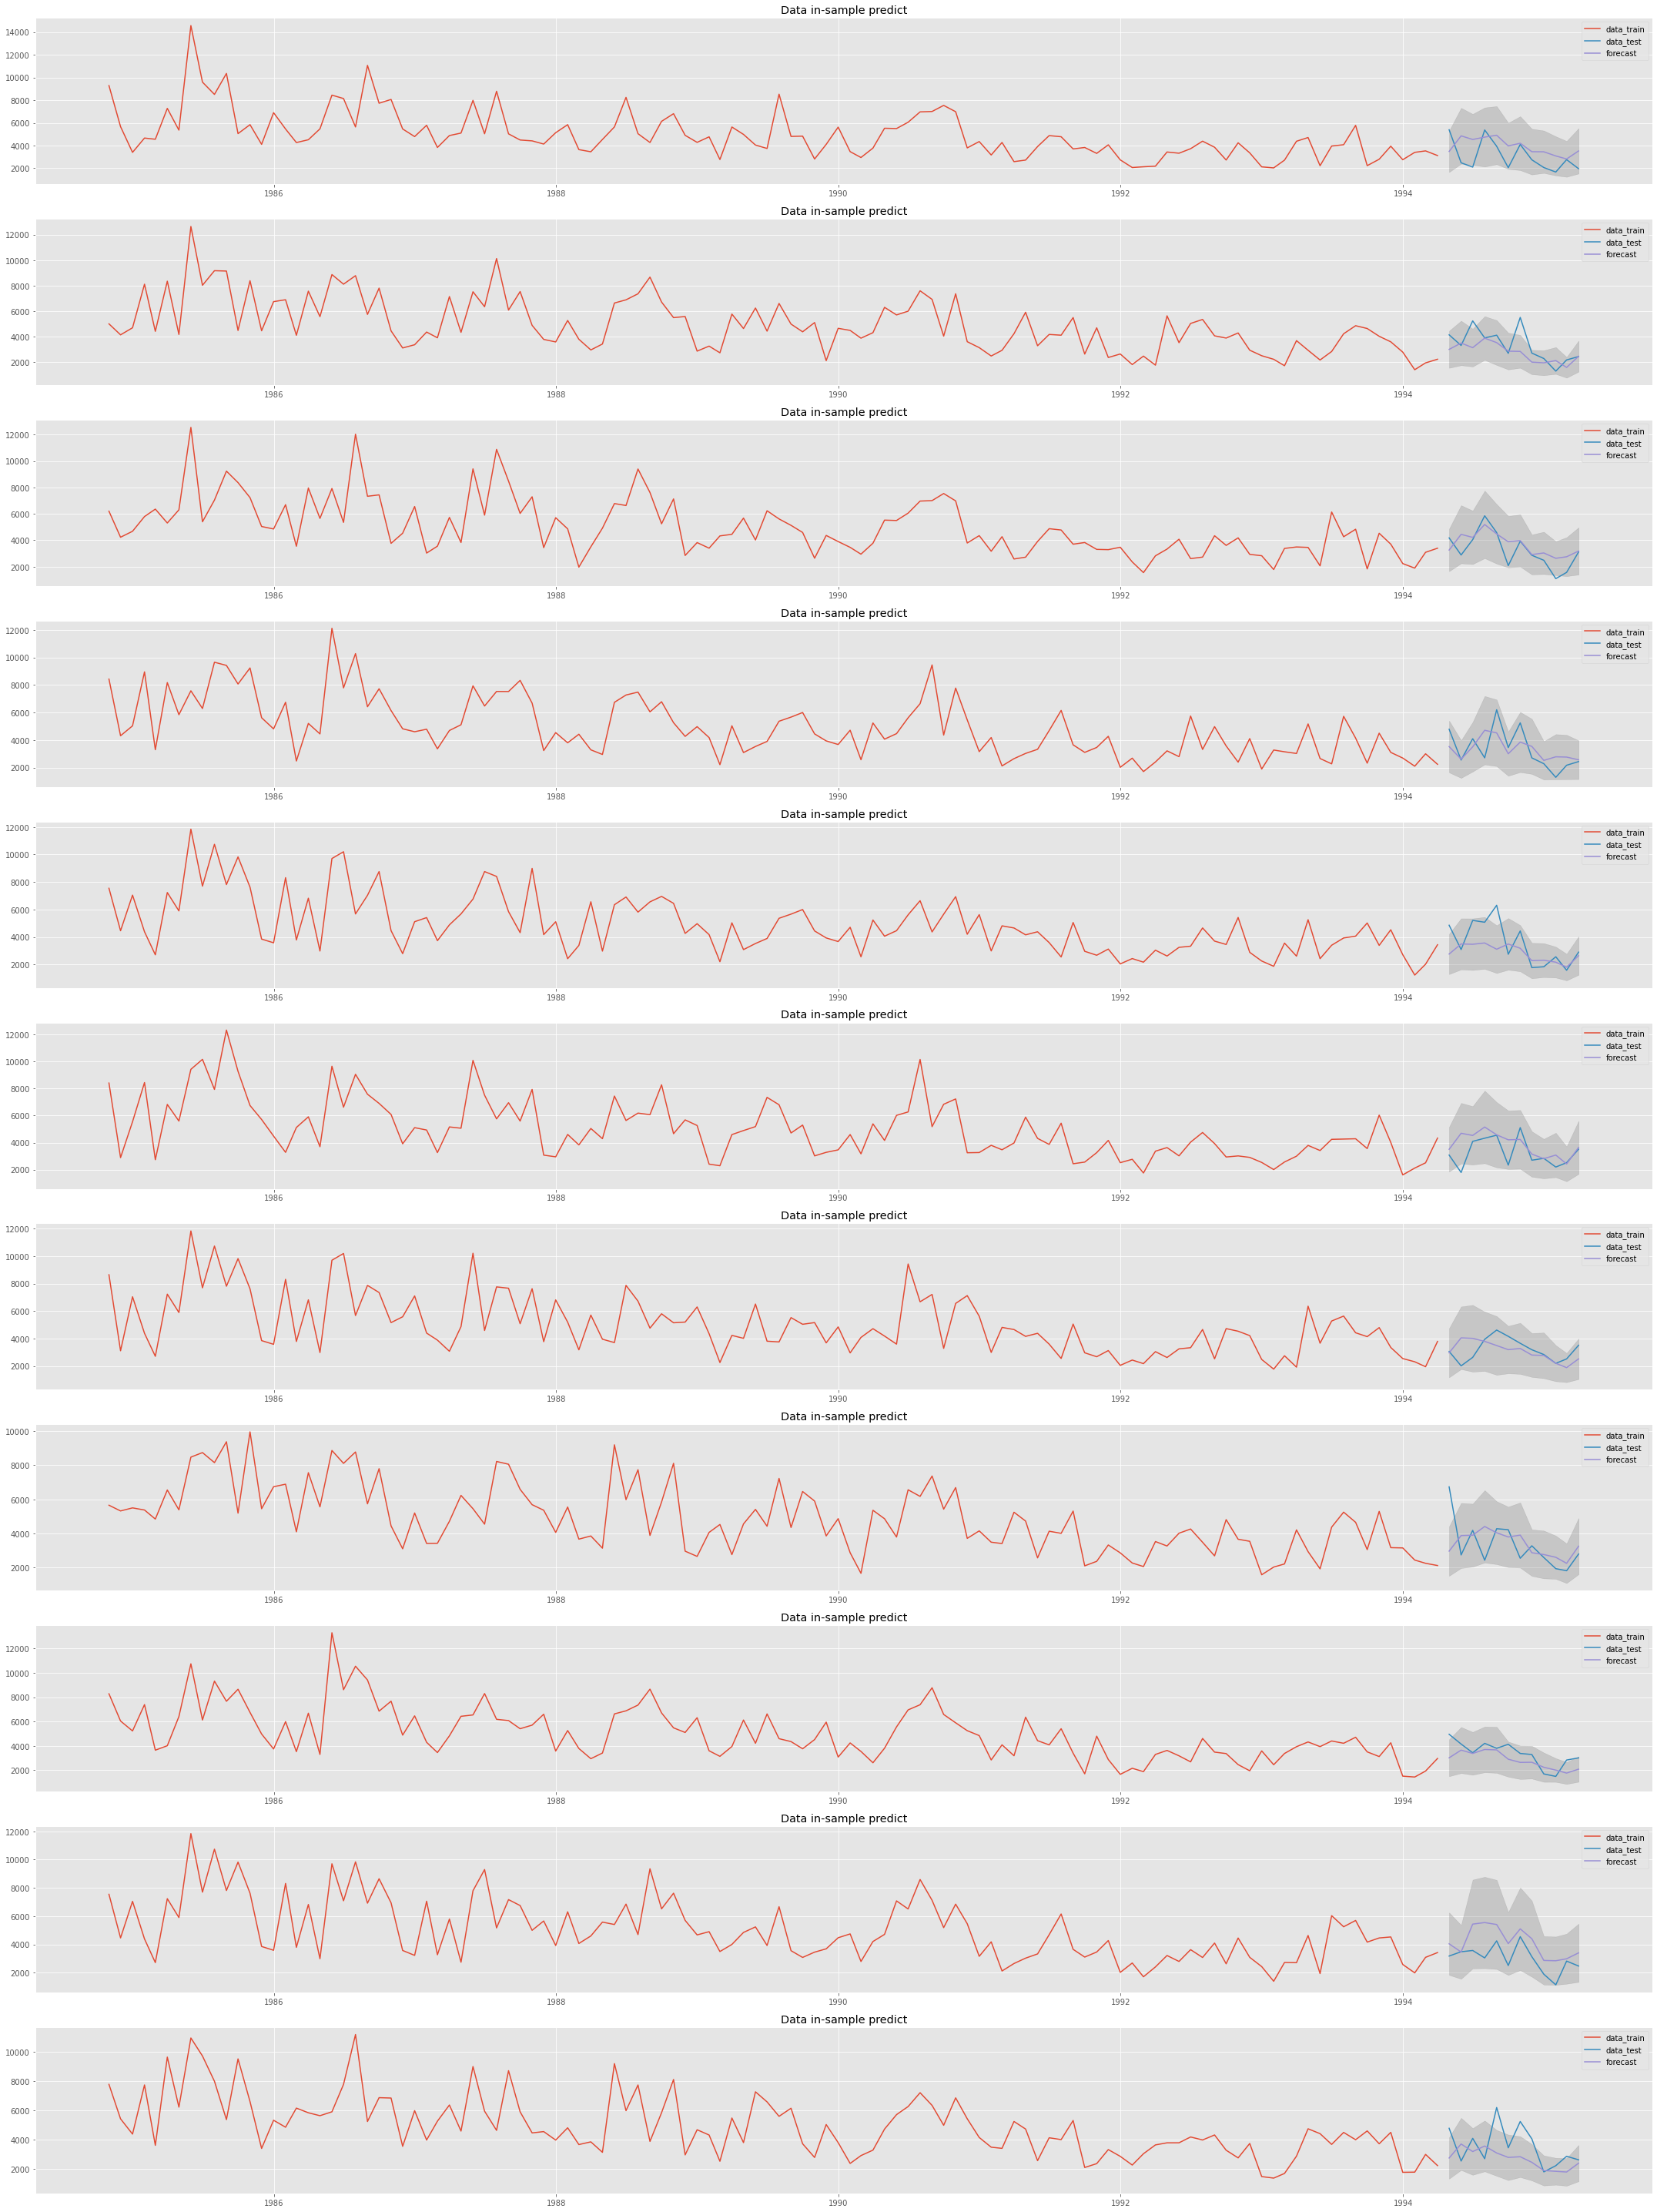

In [80]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.figure(figsize=(30,40))
MAPEs = []
for bb in range(B):
    inv_box_cox_series = inv_box_cox.iloc[:,bb]
    X_train, X_test = inv_box_cox_series[:-12], inv_box_cox_series[-12:]
    autoets = AutoETS(auto=True,n_jobs=-1,sp=12,maxiter=5000)
    autoets.fit(X_train)
    fcst = autoets.predict_interval(fh=fcast_h, X=None, coverage=0.95)
    lower=fcst.iloc[:,0]
    upper = fcst.iloc[:,1]
    y_pred=(lower+upper)/2
    print(y_pred)
    mape = mean_absolute_percentage_error(X_test, y_pred)
    print("this is mape ",mape)
    MAPEs.append(mape)
    plt.subplot(B, 1, bb + 1)
    plt.plot(X_train, label="data_train")
    plt.plot(X_test,label="data_test")
    plt.plot(X_test.index, y_pred, label="forecast")
    plt.fill_between(X_test.index, lower, upper, color='gray', alpha=0.3)
    plt.title("Data in-sample predict")
    plt.legend(loc="best")
best_model = MAPEs.index(min(MAPEs))
print("model no best predict",best_model)
plt.tight_layout()
#plt.savefig("data-in-sample-predict.jpg")
plt.show()


In [ ]:

y_pred=(lower+upper)/2

In [ ]:
upper

In [ ]:
    lower = fcst.lower
    upper = fcst.upper
    mape = mean_absolute_percentage_error(X_test, y_pred)
    print("this is mape ",mape)
    MAPEs.append(mape)
    plt.subplot(B, 1, bb + 1)
    plt.plot(X_train, label="data_train")
    plt.plot(X_test,label="data_test")
    plt.plot(X_test.index, y_pred, label="forecast")
    plt.fill_between(X_test.index, lower, upper, color='gray', alpha=0.5)
    plt.title("Data in-sample predict")
    plt.legend(loc="best")
best_model = MAPEs.index(min(MAPEs))
print("model no best predict",best_model)
plt.tight_layout()
#plt.savefig("data-in-sample-predict.jpg")
plt.show()


In [ ]:

for bb in range(B):
    inv_box_cox_series = inv_box_cox.iloc[:,bb]
    X_train, X_test = inv_box_cox_series[:-12], inv_box_cox_series[-12:]
    autoets = AutoETS(auto=True,n_jobs=-1,sp=12,maxiter=5000)
    autoets.fit(X_train)
    y_pred = autoets.predict(fcast_h)
    print(autoets.summary())


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox 
from statsmodels.nonparametric.smoothers_lowess import lowess

m3_full=[8000,5120,4720,7020,3840,7360,5040,10800,6580,8520,9460,7560,7060,4560,4660,6040, 4260,5840,5020,
       10040,10060,9100,5840,6660,5680,5820, 3280, 3000,3800,6040,5040,7100,8140,6820,9000,6840,5020,
       3020,6960,3980,3660,2740,4760,8520,4220,7160,7040,4640,7440,3900,6800,4840,3080,5220,3840,2860,
       6780,5480,3700,4460,4180,4520,3900,3580,2120,4560,4500,5660,4240,10160,7500,7180,7800,5240,5480,
       3900,2920,4100,4540,	2520,4920,3080,2800,2160,3500,3420,3480,1900,2220,2620,5160,2520,4740,3380,3380,
       2640,3640,4840,1700,2660,2920,1860,3140,3360,4400,4760,5980,3980,4040,4440,1340,1740,2420,4380,4600,3800,
       3020,4920,4040,2960,4220,1660,2280,1600,2940,2960]

m3_full= pd.Series(
    m3_full, index=pd.date_range("1984-10-1", periods=len(m3_full), freq="M"), name="m3_full")

m3_full_transformed, lambda_ = boxcox(m3_full)
plt.figure(figsize=(30,40))
frac=np.linspace(0.1,0.5,5)
for i in range(len(frac)):
    fit = lowess(m3_full_transformed, np.arange(len(m3_full_transformed)), frac=frac[i])
    plt.subplot(5, 1, i + 1)
    plt.plot(m3_full_transformed, label="Original Time Series")
    plt.plot(fit[:,0], fit[:,1], label="Lowess Decomposition")
    plt.title("loess method")
    plt.legend(loc="best")
plt.tight_layout()
plt.savefig("loess.jpg")
plt.show()


In [ ]:
np.linspace(0.1,0.5,5)

In [ ]:
np.arange(3,7)

In [ ]:
np.linspace(0.1,0.5,100)